In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import glob
import geopandas
import numpy as np
import cartopy.feature as cfeature
from cartopy import crs as ccrs
from shapely import geometry
from asmclib import geohotspot
from datetime import datetime

In [2]:
hs_df = geopandas.GeoDataFrame()

for day in range(1, 32):
    date_object = datetime(2019, 7, day)
    file = './output/polar/n20_hotspot_grid_' + date_object.strftime("%Y%m%d") + '.geojson'
    temp = geopandas.read_file(file)
    temp['sat_date'] = date_object.strftime("%d/%m/%Y")
    hs_df = hs_df.append(temp)

In [3]:
hs_df.crs = {'init': 'epsg:3857'}
hs_df['id_grid'] = hs_df.index

In [4]:
clip_area = geopandas.read_file('./verification/July_updated.shp')
clip_area = clip_area.to_crs({'init': 'epsg:3857'})

In [5]:
truth_df = pd.read_csv('./verification/july_ground_truth_2019.csv')

In [6]:
truth_df.drop(columns=["Unnamed: 0"], inplace=True)

In [7]:
truth_gdf = geopandas.GeoDataFrame(truth_df, geometry=geopandas.points_from_xy(truth_df.lon, truth_df.lat))

In [8]:
truth_gdf.crs = {'init' :'epsg:4326'}
truth_gdf = truth_gdf.to_crs({'init': 'epsg:3857'})

In [9]:
truth_gdf_b500 = truth_gdf.buffer(1500)

In [10]:
truth_gdf.geometry = truth_gdf_b500

In [11]:
hs_df_clipped = geopandas.overlay(clip_area, hs_df, how='intersection')

In [12]:
hs_df_clipped.drop(columns=['id'], inplace=True)
hs_df_clipped

,weight,geo_weight,polar_weight,adj_weight,sat_date,id_grid,geometry
0,0.265,0.0,0.265,0.514782,08/07/2019,68,"POLYGON ((11395566.192 44382.783, 11396566.192..."
1,0.225,0.0,0.225,0.474342,14/07/2019,42,"POLYGON ((11383566.192 44382.783, 11384566.192..."
2,0.205,0.0,0.205,0.452769,01/07/2019,171,"POLYGON ((11386566.192 44382.783, 11387566.192..."
3,0.165,0.0,0.165,0.406202,16/07/2019,93,"POLYGON ((11394566.192 45382.783, 11395566.192..."
4,0.165,0.0,0.165,0.406202,16/07/2019,94,"POLYGON ((11395566.192 45382.783, 11396566.192..."
5,0.440,0.0,0.440,0.663325,23/07/2019,69,"POLYGON ((11349566.192 46382.783, 11350566.192..."
6,1.000,0.0,1.005,1.000000,23/07/2019,68,"POLYGON ((11348566.192 46382.783, 11349566.192..."
7,0.115,0.0,0.115,0.339116,23/07/2019,67,"POLYGON ((11347566.192 46382.783, 11348566.192..."
8,0.440,0.0,0.440,0.663325,23/07/2019,65,"POLYGON ((11349566.192 47382.783, 11350566.192..."
9,1.000,0.0,1.355,1.000000,23/07/2019,64,"POLYGON ((11348566.192 47382.783, 11349566.192..."


In [13]:
truth_gdf['id_truth'] = truth_gdf.index
truth_gdf

,datestamp,lat,lon,period,geometry,end_date,start_date,id_truth
0,20/7/2019,-0.126831,101.696714,0 days 00:00:00.000000000,"POLYGON ((11322326.418 -14118.750, 11322319.19...",20/7/2019 0:00,20/7/2019 0:00,0
1,20/7/2019,-0.137187,101.699419,0 days 00:00:00.000000000,"POLYGON ((11322627.537 -15271.632, 11322620.31...",20/7/2019 0:00,20/7/2019 0:00,1
2,20/7/2019,-0.124976,101.709003,0 days 00:00:00.000000000,"POLYGON ((11323694.379 -13912.263, 11323687.15...",20/7/2019 0:00,20/7/2019 0:00,2
3,25/7/2019,-0.127913,101.708152,0 days 00:00:00.000000000,"POLYGON ((11323599.746 -14239.200, 11323592.52...",25/7/2019 0:00,25/7/2019 0:00,3
4,25/7/2019,-0.132241,101.698337,0 days 00:00:00.000000000,"POLYGON ((11322507.089 -14721.002, 11322499.86...",25/7/2019 0:00,25/7/2019 0:00,4
5,25/7/2019,-0.163310,101.704597,0 days 00:00:00.000000000,"POLYGON ((11323203.983 -18179.652, 11323196.76...",25/7/2019 0:00,25/7/2019 0:00,5
6,20/7/2019,-0.172894,101.705061,0 days 00:00:00.000000000,"POLYGON ((11323255.602 -19246.500, 11323248.37...",20/7/2019 0:00,20/7/2019 0:00,6
7,5/7/2019,-0.140588,101.720364,0 days 00:00:00.000000000,"POLYGON ((11324959.113 -15650.191, 11324951.89...",5/7/2019 0:00,5/7/2019 0:00,7
8,5-20/7/2019,-0.155582,101.846265,15 days 00:00:00.000000000,"POLYGON ((11338974.337 -17319.290, 11338967.11...",20/7/2019 0:00,5/7/2019 0:00,8
9,5-20/7/2019,-0.151408,101.844333,15 days 00:00:00.000000000,"POLYGON ((11338759.245 -16854.695, 11338752.02...",20/7/2019 0:00,5/7/2019 0:00,9


In [14]:
overlaid_gdf_ungrp = geopandas.overlay(truth_gdf, hs_df_clipped, how='union')

In [15]:
overlaid_gdf_ungrp.head()

,datestamp,lat,lon,period,end_date,start_date,id_truth,weight,geo_weight,polar_weight,adj_weight,sat_date,id_grid,geometry
0,20/7/2019,-0.126831,101.696714,0 days 00:00:00.000000000,20/7/2019 0:00,20/7/2019 0:00,0.0,0.385,0.0,0.385,0.620484,29/07/2019,247.0,"POLYGON ((11320857.613 -15617.217, 11320826.41..."
1,20/7/2019,-0.137187,101.699419,0 days 00:00:00.000000000,20/7/2019 0:00,20/7/2019 0:00,1.0,0.385,0.0,0.385,0.620484,29/07/2019,247.0,"POLYGON ((11320586.086 -16617.217, 11320591.16..."
2,25/7/2019,-0.127913,101.708152,0 days 00:00:00.000000000,25/7/2019 0:00,25/7/2019 0:00,3.0,0.385,0.0,0.385,0.620484,29/07/2019,247.0,"POLYGON ((11321566.192 -15639.500, 11321525.72..."
3,25/7/2019,-0.132241,101.698337,0 days 00:00:00.000000000,25/7/2019 0:00,25/7/2019 0:00,4.0,0.385,0.0,0.385,0.620484,29/07/2019,247.0,"POLYGON ((11321566.192 -16112.160, 11321442.51..."
4,20/7/2019,-0.126831,101.696714,0 days 00:00:00.000000000,20/7/2019 0:00,20/7/2019 0:00,0.0,0.235,0.0,0.235,0.484768,14/07/2019,62.0,"POLYGON ((11320857.613 -15617.217, 11320826.41..."


In [16]:
overlaid_gdf = overlaid_gdf_ungrp.sort_values(by=['adj_weight']).groupby(['id_grid', 'sat_date']).last()

In [17]:
#overlaid_gdf_ungrp.shape
overlaid_gdf_ungrp.loc[overlaid_gdf_ungrp['sat_date'] == '25/07/2019']

,datestamp,lat,lon,period,end_date,start_date,id_truth,weight,geo_weight,polar_weight,adj_weight,sat_date,id_grid,geometry
258,5/7/2019,-0.242453,101.913273,0 days 00:00:00.000000000,5/7/2019 0:00,5/7/2019 0:00,20.0,0.330,0.0,0.330,0.574456,25/07/2019,22.0,"POLYGON ((11344331.572 -25617.217, 11344359.61..."
320,5/7/2019,-0.828831,102.085739,0 days 00:00:00.000000000,5/7/2019 0:00,5/7/2019 0:00,37.0,0.295,0.0,0.295,0.543139,25/07/2019,30.0,"POLYGON ((11365566.192 -92708.560, 11365518.34..."
321,5-25/7/2019,-0.824967,102.091072,20 days 00:00:00.000000000,25/7/2019 0:00,5/7/2019 0:00,38.0,0.295,0.0,0.295,0.543139,25/07/2019,30.0,"POLYGON ((11365566.192 -93080.293, 11365559.52..."
322,5-25/7/2019,-0.827131,102.108307,20 days 00:00:00.000000000,25/7/2019 0:00,5/7/2019 0:00,45.0,0.295,0.0,0.295,0.543139,25/07/2019,30.0,"POLYGON ((11365566.192 -93119.843, 11365485.25..."
323,5-25/7/2019,-0.829527,102.099497,20 days 00:00:00.000000000,25/7/2019 0:00,5/7/2019 0:00,46.0,0.295,0.0,0.295,0.543139,25/07/2019,30.0,"POLYGON ((11364871.176 -93617.217, 11364830.60..."
324,25/7/2019,-0.832309,102.083962,0 days 00:00:00.000000000,25/7/2019 0:00,25/7/2019 0:00,47.0,0.295,0.0,0.295,0.543139,25/07/2019,30.0,"POLYGON ((11365434.646 -92655.457, 11365427.42..."
325,5-25/7/2019,-0.837178,102.082493,20 days 00:00:00.000000000,25/7/2019 0:00,5/7/2019 0:00,49.0,0.295,0.0,0.295,0.543139,25/07/2019,30.0,"POLYGON ((11365271.173 -93197.540, 11365263.95..."
326,5-25/7/2019,-0.831845,102.091459,20 days 00:00:00.000000000,25/7/2019 0:00,5/7/2019 0:00,50.0,0.295,0.0,0.295,0.543139,25/07/2019,30.0,"POLYGON ((11364566.192 -92617.217, 11365566.19..."
327,5-25/7/2019,-0.846684,102.091459,20 days 00:00:00.000000000,25/7/2019 0:00,5/7/2019 0:00,54.0,0.295,0.0,0.295,0.543139,25/07/2019,30.0,"POLYGON ((11364566.192 -92771.419, 11364622.16..."
328,5-25/7/2019,-0.839960,102.112017,20 days 00:00:00.000000000,25/7/2019 0:00,5/7/2019 0:00,55.0,0.295,0.0,0.295,0.543139,25/07/2019,30.0,"POLYGON ((11365563.136 -93617.217, 11365557.73..."


In [18]:
overlaid_gdf.loc[overlaid_gdf['adj_weight'].isna(), 'adj_weight'] = 0
overlaid_gdf.loc[overlaid_gdf['polar_weight'].isna(), 'polar_weight'] = 0
overlaid_gdf.loc[overlaid_gdf['geo_weight'].isna(), 'geo_weight'] = 0

In [19]:
overlaid_gdf = overlaid_gdf.reset_index()
overlaid_gdf = geopandas.GeoDataFrame(overlaid_gdf)

In [20]:
overlaid_gdf.loc[overlaid_gdf['lat'].isna(), 'truth_flag'] = 0
overlaid_gdf['start_date'].unique()

array(['25/7/2019 0:00', nan, '30/7/2019 0:00', '5/7/2019 0:00',
       '28/7/2019 0:00', '20/7/2019 0:00', '16/7/2019 0:00',
       '1/7/2019 0:00', '10/7/2019 0:00'], dtype=object)

In [21]:
for index, row in overlaid_gdf.iterrows():
    if pd.isna(row['start_date']):
        pass
    else:
        sat_date =  datetime.strptime(row['sat_date'], "%d/%m/%Y")
        truth_start_date = datetime.strptime(row['start_date'], "%d/%m/%Y %H:%M")
        truth_end_date = datetime.strptime(row['end_date'], "%d/%m/%Y %H:%M")
        if (sat_date >= truth_start_date) and (sat_date <= truth_end_date):
            overlaid_gdf.loc[index, 'truth_flag'] = 1
        else:
            overlaid_gdf.loc[index, 'truth_flag'] = 0 #np.nan

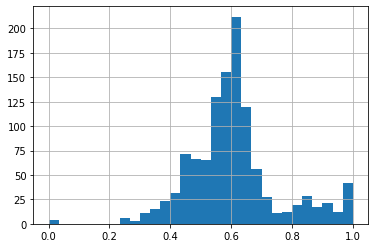

In [66]:
overlaid_gdf['adj_weight'].hist(bins=30)

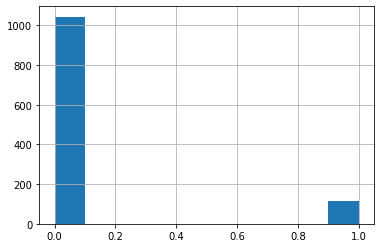

In [23]:
overlaid_gdf['truth_flag'].hist()
#overlaid_gdf.to_file('test.geojson', driver='GeoJSON')

In [24]:
final_gdf = overlaid_gdf.dropna(axis=0, subset=['truth_flag'])

In [25]:
final_gdf

,id_grid,sat_date,datestamp,lat,lon,period,end_date,start_date,id_truth,weight,geo_weight,polar_weight,adj_weight,geometry,truth_flag
0,5.0,25/07/2019,25/7/2019,0.191600,101.865014,0 days 00:00:00.000000000,25/7/2019 0:00,25/7/2019 0:00,168.0,0.165,0.0,0.165,0.406202,"POLYGON ((11338566.192 23382.783, 11339566.192...",1.0
1,6.0,25/07/2019,25/7/2019,0.191600,101.865014,0 days 00:00:00.000000000,25/7/2019 0:00,25/7/2019 0:00,168.0,0.165,0.0,0.165,0.406202,"POLYGON ((11339566.192 23382.783, 11340566.192...",1.0
2,7.0,25/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.305,0.0,0.305,0.552268,"POLYGON ((12196566.192 16382.783, 12197566.192...",0.0
3,8.0,25/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.305,0.0,0.305,0.552268,"POLYGON ((12197566.192 16382.783, 12198566.192...",0.0
4,14.0,04/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.230,0.0,0.230,0.479583,"POLYGON ((11461566.192 47382.783, 11462566.192...",0.0
5,15.0,04/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.230,0.0,0.230,0.479583,"POLYGON ((11461566.192 46382.783, 11462566.192...",0.0
6,15.0,25/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.195,0.0,0.195,0.441588,"POLYGON ((11342566.192 -19617.217, 11343566.19...",0.0
7,16.0,05/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.185,0.0,0.185,0.430116,"POLYGON ((11384566.192 49382.783, 11385566.192...",0.0
8,16.0,25/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.195,0.0,0.195,0.441588,"POLYGON ((11343566.192 -19617.217, 11344566.19...",0.0
9,16.0,26/07/2019,30/7/2019,0.245115,101.753937,0 days 00:00:00.000000000,30/7/2019 0:00,30/7/2019 0:00,164.0,0.290,0.0,0.290,0.538516,"POLYGON ((11328566.192 27894.287, 11328582.306...",0.0


In [52]:
from sklearn import metrics
y = final_gdf['truth_flag'].values.astype(int)
scores = final_gdf['adj_weight'].values.astype(float)
scores_polar = final_gdf['polar_weight'].values.astype(float)
fpr, tpr, thresholds = metrics.roc_curve(y, scores_polar, pos_label=1)

In [53]:
print (fpr, tpr, thresholds)

[0.00000000e+00 9.57854406e-04 3.83141762e-03 5.74712644e-03
 7.66283525e-03 9.57854406e-03 1.53256705e-02 1.72413793e-02
 1.72413793e-02 1.81992337e-02 1.81992337e-02 1.91570881e-02
 2.20306513e-02 2.29885057e-02 2.49042146e-02 2.58620690e-02
 3.16091954e-02 3.54406130e-02 3.83141762e-02 4.21455939e-02
 4.31034483e-02 4.50191571e-02 4.59770115e-02 4.78927203e-02
 4.88505747e-02 5.17241379e-02 5.36398467e-02 5.74712644e-02
 5.93869732e-02 6.22605364e-02 6.89655172e-02 6.99233716e-02
 7.37547893e-02 7.66283525e-02 7.75862069e-02 8.14176245e-02
 8.33333333e-02 8.62068966e-02 8.81226054e-02 9.29118774e-02
 9.38697318e-02 9.96168582e-02 1.02490421e-01 1.04406130e-01
 1.05363985e-01 1.07279693e-01 1.08237548e-01 1.13984674e-01
 1.14942529e-01 1.16858238e-01 1.19731801e-01 1.21647510e-01
 1.22605364e-01 1.26436782e-01 1.29310345e-01 1.30268199e-01
 1.32183908e-01 1.34099617e-01 1.35057471e-01 1.39846743e-01
 1.43678161e-01 1.44636015e-01 1.49425287e-01 1.50383142e-01
 1.52298851e-01 1.551724

In [54]:
metrics.roc_auc_score(y, scores)

0.5047010485985077

In [55]:
csi = 1/((1/(1-fpr)) + (1/tpr) - 1)
csi.argmax()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


94

In [56]:
csi[csi.argmax()], tpr[csi.argmax()], fpr[csi.argmax()]

(0.34903010907190907, 0.5614035087719298, 0.5201149425287356)

In [57]:
thresholds[csi.argmax()]

0.355

In [58]:
csi.max()

0.34903010907190907

In [59]:
csi.shape, fpr.shape, tpr.shape

((144,), (144,), (144,))

Text(0.5, 1.0, 'Verification scores for N20 VIIRS (Jul 2019)')

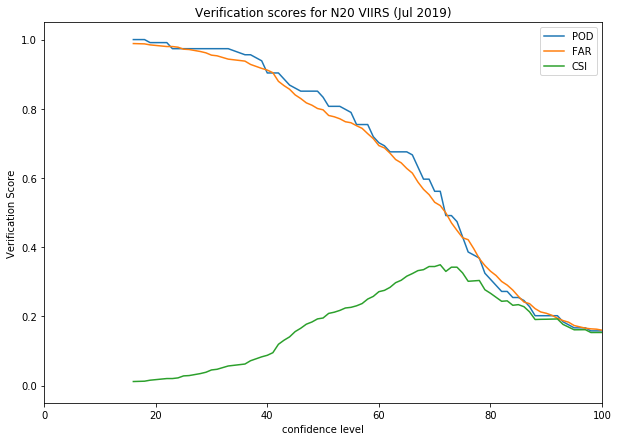

In [64]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes()

confidence = thresholds * 200

ax.plot(confidence[1:-2], tpr[1:-2], label='POD');
ax.plot(confidence[1:-2], fpr[1:-2], label='FAR');
ax.plot(confidence[1:-2], csi[1:-2], label='CSI');
ax.legend()
ax.set_xlim([0,100])
ax.set_xlabel('confidence level')
ax.set_ylabel('Verification Score')
plt.title('Verification scores for N20 VIIRS (Jul 2019)')